# Домашнє завдання №10

# Частина №1

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

## Завантаження датасету

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print("Розмір тренувального датасету:", len(train_data))
print("Перший елемент тренувального датасету:", train_data[0])
print("Мітки тренувального датасету:", train_labels)
print("Значення міток: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Перший елемент тренувального датасету: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


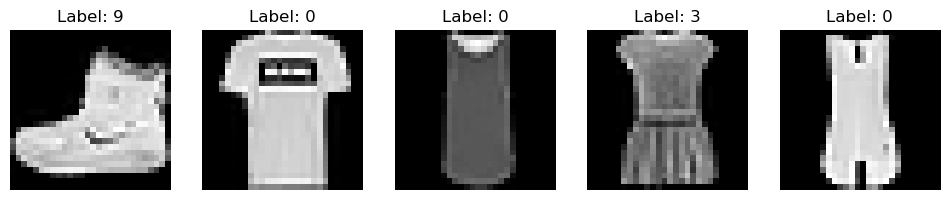

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()


## Приклад елементу даних

In [6]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

print(train_data[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

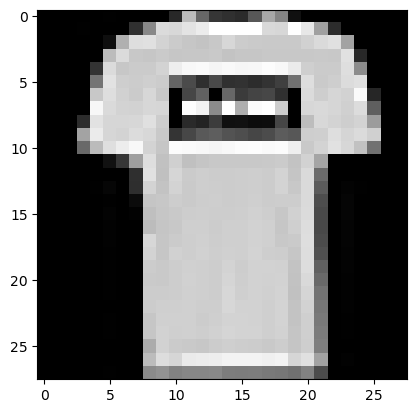

In [7]:
plt.imshow(train_data[1], cmap='gray')

## Створення моделі

In [8]:
from keras import layers
from keras import models
from keras.layers import PReLU

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)), 
    layers.Conv2D(32, (3, 3)),  
    PReLU(),                         
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    PReLU(),                          
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    PReLU(),

    layers.Flatten(),
    layers.Dense(64),
    PReLU(),                          
    layers.Dense(10, activation="softmax") 
])



In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 26, 26, 32)     │        21,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 11, 11, 64)     │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 3, 3, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_3 (PReLU)               │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,338 (481.79 KB)

 Trainable params: 123,338 (481.79 KB)

 Non-trainable params: 0 (0.00 B)

## Компіляція і тренування моделі

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=6, batch_size=256, validation_data=(test_data, test_labels))

Epoch 1/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.6518 - loss: 1.8242 - val_accuracy: 0.8389 - val_loss: 0.4650
Epoch 2/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.8596 - loss: 0.3942 - val_accuracy: 0.8693 - val_loss: 0.3681
Epoch 3/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.8848 - loss: 0.3180 - val_accuracy: 0.8774 - val_loss: 0.3468
Epoch 4/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.8938 - loss: 0.2918 - val_accuracy: 0.8821 - val_loss: 0.3233
Epoch 5/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9047 - loss: 0.2604 - val_accuracy: 0.8913 - val_loss: 0.3045
Epoch 6/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9133 - loss: 0.2364 - val_accuracy: 0.8898 - val_loss: 0.3165


In [11]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8934 - loss: 0.3188
Test Accuracy: 0.8898000121116638


In [12]:
def history_visual(history):    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

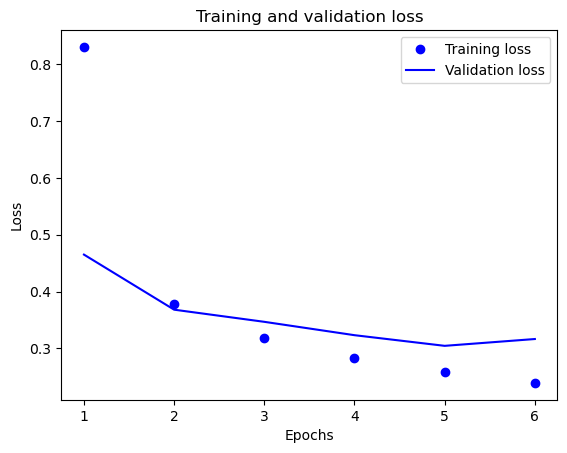

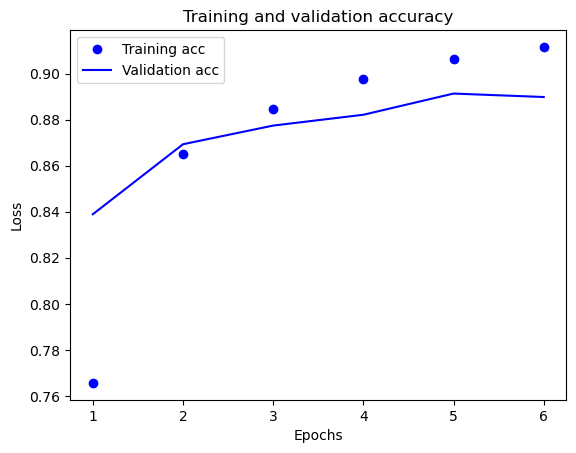

In [13]:
history_visual(history)

## Висновок №1
Побудована модель показала гарні результати на навчальній вибірці: точність нейромережі становить приблизно 98%. На валідаційних даних результати дещо гірші: максимальна точність склала приблизно 91%. У порівнянні з найкращою моделлю, побудованою у домашньому завданні №9, згорткова нейромережа показала кращі результати.

### Порівняльна таблиця двох нейромереж
|     Параметр    | Нейромережа ДЗ №9 | Нейромережа ДЗ №10 |
|-----------------|-------|--------|
|Кількість шарів  |   3   |    8   |
|Функція активації| PReLU |  PReLU |
|Кількість епох   |   50  |    6   |
|Розмір батчу     |  250  |   256  |
|Оптимізатор      | Adam  |  Adam  |
|Точність         |  91%  |   98%  |  
|Точність на валідаційних даних   |  90%  |   91%  |


# Частина №2:

## Завантаження передвиборної моделі VGG16 без повністю з'єднаних шарів

In [14]:
from PIL import Image
import numpy as np

def resize_image(image, target_size=(64, 64)):
    image = Image.fromarray(image)
    image = image.resize(target_size)
    return np.array(image)

# Ensure images are converted from grayscale to RGB
def convert_to_rgb(images):
    images_rgb = np.stack([np.repeat(image[..., np.newaxis], 3, axis=2) for image in images])
    return images_rgb

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize, resize, and convert to RGB
train_images = np.array([resize_image(img) for img in train_images]) / 255.
test_images = np.array([resize_image(img) for img in test_images]) / 255.

train_images = convert_to_rgb(train_images)
test_images = convert_to_rgb(test_images)


In [15]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg16_base.trainable = False
vgg16_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, PReLU

model1 = Sequential([
    vgg16_base,  # Pre-trained VGG16 base
    Flatten(),
    Dense(256),  # Using a larger layer before the final classification might help learning
    PReLU(),     # PReLU layers need to be given input shapes when used after Dense layers
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_4 (PReLU)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
history1 = model1.fit(
    train_images,
    train_labels, 
    epochs=10,
    batch_size=256,  
    validation_data=(test_images, test_labels)
)


Epoch 1/10
 13/235 ━━━━━━━━━━━━━━━━━━━━ 9:26 3s/step - accuracy: 0.4692 - loss: 1.6059

KeyboardInterrupt: 

In [ ]:
def history_visual(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

history_visual(history1)


In [ ]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg16_base.trainable = False
vgg16_base.summary()

## Побудова моделі з виділенням ознак

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, PReLU

# Initialize the Sequential model incorporating VGG16 as the base
model1 = Sequential([
    vgg16_base,  # Pre-trained VGG16 base
    Flatten(),   # Flatten the output to feed into the dense layer
    Dense(64),   # Dense layer with 64 units
    PReLU(),     # PReLU activation layer
    Dense(10, activation='softmax')  # Output layer for classification among 10 classes
])

# Compile the model to prepare for training
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Display the model summary to verify correct setup
model1.summary()


## Компіляція мережі

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Підготовка даних

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from keras import layers
from keras import models
from keras.layers import PReLU
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def resize_image(image, target_size=(64, 64)):
    image = Image.fromarray(image)
    image = image.resize(target_size)
    return np.array(image)

def preprocess_image(image):
    image = image / 255.0  
    return image


(train_data1, train_labels1), (test_data1, test_labels1) = fashion_mnist.load_data()

train_data1, test_data1 = train_data1 / 255., test_data1 / 255.

resized_train_data = np.array([resize_image(img) for img in train_data1])
resized_test_data = np.array([resize_image(img) for img in test_data1])

# Перевірка розмірів після зміни
print(resized_train_data.shape)
print(resized_test_data.shape)


In [ ]:
resized_train_data = np.expand_dims(resized_train_data, axis=-1)
resized_train_data = np.repeat(resized_train_data, 3, axis=-1)
resized_test_data = np.expand_dims(resized_test_data, axis=-1)
resized_test_data = np.repeat(resized_test_data, 3, axis=-1)

print(resized_train_data.shape)
print(resized_test_data.shape)

## Тренування моделі

In [ ]:
history1 = model1.fit(
    resized_train_data,
    train_labels1, 
    epochs=10,
    batch_size=256,  
    validation_data=(resized_test_data, test_labels1)
)

In [ ]:
import matplotlib.pyplot as plt

history_visual(history1)